In [92]:
import numpy as np
import pandas as pd

import shutil
import os
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import scipy
import datetime as dt
import random
import re
import shutil


import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Splitting Data Into Train, Validation and Test 

In [102]:
data_dir = 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model/'
data_dir

'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model/'

In [103]:
os.listdir(data_dir)

['Door Tasks',
 'Lawn Maintenance',
 'Mold Tasks',
 'Pool Tasks',
 'Roof Tasks',
 'Securing, Boarding and Reglazing',
 'Winterization, De-Winterization & Plumbing']

In [120]:
import random
training_image_set_list_with_path = []
validation_image_set_list_with_path = []
evaluation_image_set_list_with_path = []
for fold in os.listdir(data_dir):
  training_set = []
  validation_set = []
  evaluation_set = []
  image_files = os.listdir(data_dir+'/'+fold)
  random.shuffle(image_files)
  training_set = image_files[:int(len(image_files)*0.75)]
  validation_set = image_files[int(len(image_files)*0.75):int(len(image_files)*0.75)+int(len(image_files)*0.15)]
  evaluation_set = image_files[int(len(image_files)*0.75)+int(len(image_files)*0.15):]

  for item in training_set:
    training_image_set_list_with_path.append(data_dir+'/'+fold+'/'+item)
  for item in validation_set:
     validation_image_set_list_with_path.append(data_dir+'/'+fold+'/'+item)
  for item in evaluation_set:
     evaluation_image_set_list_with_path.append(data_dir+'/'+fold+'/'+item)

print("training_set :",training_image_set_list_with_path)
print("len(training_set) :",len(training_image_set_list_with_path))
print("validation_set :",validation_image_set_list_with_path)
print("len(validation_set) :",len(validation_image_set_list_with_path))
print("evaluation_set :",evaluation_image_set_list_with_path)
print("len(evaluation_set) :",len(evaluation_image_set_list_with_path))


# Image shape calculator :
training_image_shape_list = []
for item in training_image_set_list_with_path:
   image_training = cv2.imread(item)
   image_shape = image_training.shape
   training_image_shape_list.append(image_shape)

mean_training_image_shape = [sum(ele) / len(training_image_shape_list) for ele in zip(*training_image_shape_list)]
minimum_training_image_shape = [np.min(ele) for ele in zip(*training_image_shape_list)]

validation_image_shape_list = []
for item in validation_image_set_list_with_path:
   image_validation = cv2.imread(item)
   image_shape = image_validation.shape
   validation_image_shape_list.append(image_shape)

mean_validation_image_shape = [sum(ele) / len(validation_image_shape_list) for ele in zip(*validation_image_shape_list)]
minimum_validation_image_shape = [np.min(ele) for ele in zip(*validation_image_shape_list)]

evaluation_image_shape_list = []
for item in evaluation_image_set_list_with_path:
   image_evaluation = cv2.imread(item)
   image_shape = image_evaluation.shape
   evaluation_image_shape_list.append(image_shape)

mean_evaluation_image_shape = [sum(ele) / len(evaluation_image_shape_list) for ele in zip(*evaluation_image_shape_list)]
minimum_evaluation_image_shape = [np.min(ele) for ele in zip(*evaluation_image_shape_list)]
  
print("mean_training_image_shape :",mean_training_image_shape)
print("minimum_training_image_shape :",minimum_training_image_shape)
print("mean_validation_image_shape :",mean_validation_image_shape)
print("minimum_evaluation_image_shape :",minimum_evaluation_image_shape)
print("mean_evaluation_image_shape :",mean_evaluation_image_shape)
print("minimum_evaluation_image_shape :",minimum_evaluation_image_shape)

training_path = 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_1_ml_model' +'/'+ 'training'+'/' 
validation_path = 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_1_ml_model' +'/'+ 'validation'+'/' 
evaluation_path = 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_1_ml_model' +'/'+ 'evaluation'+'/' 

task_folder_list = os.listdir(data_dir) 
for item in training_image_set_list_with_path:
   image_training = cv2.imread(item)
   image_training = cv2.resize(image_training,(147, 122))
   if task_folder_list[0] in item:
      destpath = training_path + '/' + task_folder_list[0] + '/' +'train_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_training)
   elif task_folder_list[1] in item:
      destpath = training_path + '/' + task_folder_list[1] + '/' +'train_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_training)
   elif task_folder_list[2] in item:
      destpath = training_path + '/' + task_folder_list[2] + '/' +'train_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_training)
   elif task_folder_list[3] in item:
      destpath = training_path + '/' + task_folder_list[3] + '/' +'train_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_training)
   elif task_folder_list[4] in item:
      destpath = training_path + '/' + task_folder_list[4] + '/' +'train_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_training)
   elif task_folder_list[5] in item:
      destpath = training_path + '/' + task_folder_list[5] + '/' +'train_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_training)
   elif task_folder_list[6] in item:
      destpath = training_path + '/' + task_folder_list[6] + '/' +'train_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_training)

task_folder_list = os.listdir(data_dir) 
for item in validation_image_set_list_with_path:
   image_validation = cv2.imread(item)
   image_validation = cv2.resize(image_validation,(147, 122))
   if task_folder_list[0] in item:
      destpath = validation_path + '/' + task_folder_list[0] + '/' +'valid_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_validation)
   elif task_folder_list[1] in item:
      destpath = validation_path + '/' + task_folder_list[1] + '/' +'valid_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_validation)
   elif task_folder_list[2] in item:
      destpath = validation_path + '/' + task_folder_list[2] + '/' +'valid_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_validation)
   elif task_folder_list[3] in item:
      destpath = validation_path + '/' + task_folder_list[3] + '/' +'valid_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_validation)
   elif task_folder_list[4] in item:
      destpath = validation_path + '/' + task_folder_list[4] + '/' +'valid_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_validation)
   elif task_folder_list[5] in item:
      destpath = validation_path + '/' + task_folder_list[5] + '/' +'valid_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_validation)
   elif task_folder_list[6] in item:
      destpath = validation_path + '/' + task_folder_list[6] + '/' +'valid_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_validation)



task_folder_list = os.listdir(data_dir) 
for item in evaluation_image_set_list_with_path:
   image_evaluation = cv2.imread(item)
   image_evaluation = cv2.resize(image_evaluation,(147, 122))
   if task_folder_list[0] in item:
      destpath = evaluation_path + '/' + task_folder_list[0] + '/' +'eval_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_evaluation)
   elif task_folder_list[1] in item:
      destpath = evaluation_path + '/' + task_folder_list[1] + '/' +'eval_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_evaluation)
   elif task_folder_list[2] in item:
      destpath = evaluation_path + '/' + task_folder_list[2] + '/' +'eval_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_evaluation)
   elif task_folder_list[3] in item:
      destpath = evaluation_path + '/' + task_folder_list[3] + '/' +'eval_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_evaluation)
   elif task_folder_list[4] in item:
      destpath = evaluation_path + '/' + task_folder_list[4] + '/' +'eval_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_evaluation)
   elif task_folder_list[5] in item:
      destpath = evaluation_path + '/' + task_folder_list[5] + '/' +'eval_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_evaluation)
   elif task_folder_list[6] in item:
      destpath = evaluation_path + '/' + task_folder_list[6] + '/' +'eval_' + item.split('/')[-1]
      cv2.imwrite(destpath,image_evaluation)






training_set : ['D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model//Door Tasks/aug_im_1_1_0_7847.jpg', 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model//Door Tasks/aug_im_1_1_0_6253.jpg', 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model//Door Tasks/aug_im_1_1_0_7344.jpg', 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model//Door Tasks/aug_im_1_1_0_5804.jpg', 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model//Door Tasks/aug_im_6_1_0_2334.jpg', 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model//Door Tasks/aug_im_2_1_0_5023.jpg', 'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_

#### Modelling Part

In [121]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shutil
import os

# matplotlib.use("Agg")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [122]:
from matplotlib.image import imread

import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [123]:
task_dir = r'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/augmented_images_prop_preserv_label_1_ml_model/'

BASE_PATH = r'D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_1_ml_model/'

TRAIN = "training"
TEST = "evaluation"
VAL = "validation"

trainPath = os.path.sep.join([BASE_PATH, TRAIN])
valPath = os.path.sep.join([BASE_PATH, VAL])
testPath = os.path.sep.join([BASE_PATH, TEST])

print('trainPath : ',trainPath)
print('valPath : ',valPath)
print('testPath : ',testPath)

totalTrain = len(list(paths.list_images(trainPath)))
totalVal = len(list(paths.list_images(valPath)))
totalTest = len(list(paths.list_images(testPath)))

print('totalTrain :',totalTrain)
print('totalVal :',totalVal)
print('totalTest :',totalTest)

CLASSES = os.listdir(task_dir)
BATCH_SIZE = 32



trainPath :  D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_1_ml_model/\training
valPath :  D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_1_ml_model/\validation
testPath :  D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/training_testing_validation_images_prop_preserv_label_1_ml_model/\evaluation
totalTrain : 5881
totalVal : 1175
totalTest : 789


In [127]:
trainAug = ImageDataGenerator()
testAug = ImageDataGenerator()
valAug = ImageDataGenerator()

mean = np.array([123.68, 116.779, 103.939], dtype="float32")

trainAug.mean = mean
valAug.mean = mean

trainGen = trainAug.flow_from_directory(
    trainPath,
    class_mode="categorical",
    target_size=(147, 122),
    color_mode="rgb",
    shuffle=True,
    batch_size=BATCH_SIZE)

# initialize the validation generator
valGen = valAug.flow_from_directory(
    valPath,
    class_mode="categorical",
    target_size=(147, 122),
    color_mode="rgb",
    shuffle=False,
    batch_size=BATCH_SIZE)


# initialize the testing generator

testGen = testAug.flow_from_directory(
    testPath,
    class_mode="categorical",
    target_size=(147, 122),
    color_mode="rgb",
    shuffle=False,
    batch_size=BATCH_SIZE)

Found 5881 images belonging to 7 classes.
Found 1175 images belonging to 7 classes.
Found 789 images belonging to 7 classes.


In [128]:
LABEL = valGen.class_indices
LE_PATH =os.path.sep.join(['D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/after_training_testing_validation_images_prop_preserv_label_1_ml_model_output_result', "pp_label_1_segregation_le.cpickle"])
print(LE_PATH)
l = open(LE_PATH, "wb")
l.write(pickle.dumps(LABEL))
l.close()

D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/after_training_testing_validation_images_prop_preserv_label_1_ml_model_output_result\pp_label_1_segregation_le.cpickle


In [129]:
baseModel = VGG16(weights="imagenet", include_top=False, 
                  input_tensor=Input(shape=(147, 122, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(512, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
headModel = Dense(len(CLASSES), activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False
    
print("[INFO] compiling model...")
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="CategoricalCrossentropy", optimizer=opt, 
              metrics=["accuracy"])

print("[INFO] training head...")
H = model.fit(
    x=trainGen,
    steps_per_epoch=totalTrain // BATCH_SIZE,
    validation_data=valGen,
    validation_steps=totalVal // BATCH_SIZE,
    epochs=12)

[INFO] compiling model...
[INFO] training head...
Epoch 1/12
183/183 [==============================] - 297s 2s/step - loss: 266.6790 - accuracy: 0.6603 - val_loss: 254.3952 - val_accuracy: 0.7413
Epoch 2/12
183/183 [==============================] - 363s 2s/step - loss: 102.5115 - accuracy: 0.8605 - val_loss: 214.0262 - val_accuracy: 0.7804
Epoch 3/12
183/183 [==============================] - 386s 2s/step - loss: 44.7212 - accuracy: 0.9202 - val_loss: 196.8415 - val_accuracy: 0.8003
Epoch 4/12
183/183 [==============================] - 497s 3s/step - loss: 20.5090 - accuracy: 0.9535 - val_loss: 196.7288 - val_accuracy: 0.8038
Epoch 5/12
183/183 [==============================] - 500s 3s/step - loss: 7.4454 - accuracy: 0.9769 - val_loss: 162.7827 - val_accuracy: 0.8264
Epoch 6/12
183/183 [==============================] - 496s 3s/step - loss: 3.2947 - accuracy: 0.9856 - val_loss: 159.9600 - val_accuracy: 0.8194
Epoch 7/12
183/183 [==============================] - 410s 2s/step - loss:

In [130]:
print('totalTest :',totalTest)



print("[INFO] evaluating after fine-tuning network head...")
testGen.reset()
predIdxs = model.predict(x=testGen,
                         steps=(totalTest // BATCH_SIZE) + 1)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testGen.classes, predIdxs,
                            target_names=testGen.class_indices.keys()))

totalTest : 789
[INFO] evaluating after fine-tuning network head...
25/25 [==============================] - 29s 1s/step
                                            precision    recall  f1-score   support

                                Door Tasks       0.81      0.74      0.77       107
                          Lawn Maintenance       0.90      0.91      0.90       110
                                Mold Tasks       0.66      0.88      0.75        49
                                Pool Tasks       0.94      0.85      0.89        73
                                Roof Tasks       0.83      0.83      0.83       164
          Securing, Boarding and Reglazing       0.78      0.77      0.77        86
Winterization, De-Winterization & Plumbing       0.86      0.86      0.86       200

                                  accuracy                           0.83       789
                                 macro avg       0.83      0.83      0.83       789
                              weighte

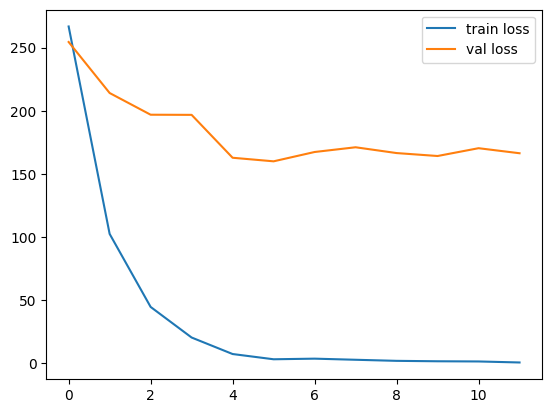

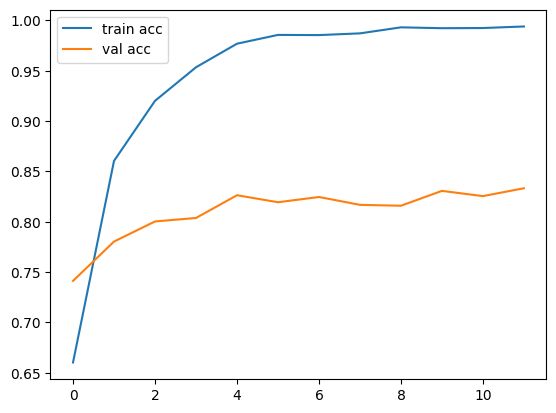

In [131]:
# plot some data
import matplotlib.pyplot as plt
# loss
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [132]:
print("[INFO] serializing network...")
MODEL_PATH = os.path.sep.join(['D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/after_training_testing_validation_images_prop_preserv_label_1_ml_model_output_result', "vgg16_pp_image_segregation_label_1_classification_01_08_2023.h5"])
model.save(MODEL_PATH, save_format="h5")

[INFO] serializing network...


Found 789 images belonging to 7 classes.
1/1 [==============================] - 1s 933ms/step
[[ 79   1   4   1   6   3  13]
 [  0 100   0   2   4   2   2]
 [  1   0  43   0   2   2   1]
 [  1   3   2  62   4   1   0]
 [  3   5   6   1 136   7   6]
 [  5   1   2   0   5  66   7]
 [  8   1   8   0   7   4 172]]
Found 789 images belonging to 7 classes.
{'Door Tasks': 0, 'Lawn Maintenance': 1, 'Mold Tasks': 2, 'Pool Tasks': 3, 'Roof Tasks': 4, 'Securing, Boarding and Reglazing': 5, 'Winterization, De-Winterization & Plumbing': 6}


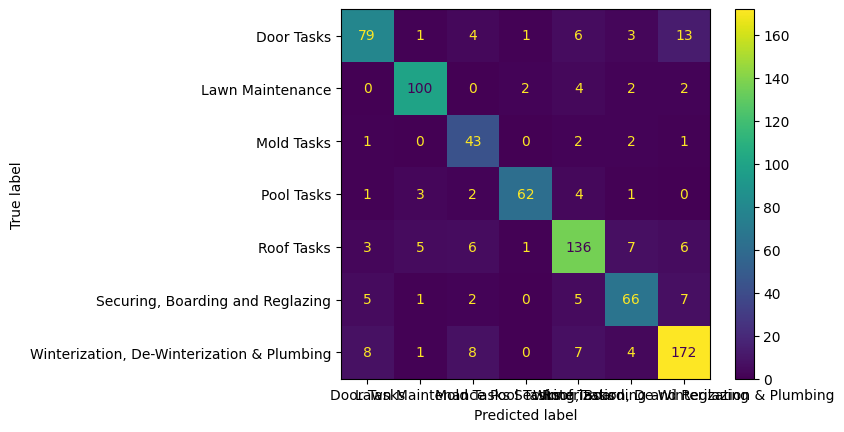

In [133]:
from tensorflow.keras.models import load_model

model = load_model('D:/Grass_Image_Classification/Augmentation_Required_For_Aviparnada/after_training_testing_validation_images_prop_preserv_label_1_ml_model_output_result/vgg16_pp_image_segregation_label_1_classification_01_08_2023.h5')

predictions = []
targets = []
i = 0
for x, y in testAug.flow_from_directory(testPath,class_mode="categorical",target_size=(147, 122),color_mode="rgb",shuffle=False,batch_size=BATCH_SIZE*2):
  i += 1
  if i % 50 == 0:
    print(i)
  p = model.predict(x)
  p = np.argmax(p, axis=1)
  y = np.argmax(y, axis=1)
  predictions = np.concatenate((predictions, p))
  targets = np.concatenate((targets, y))
  if len(targets) >= totalTest:
    break
cm = confusion_matrix(targets, predictions)
print(cm)

# get label mapping for confusion matrix plot later
testGen = testAug.flow_from_directory(testPath,class_mode="categorical",target_size=(147, 122),color_mode="rgb",shuffle=False,batch_size=BATCH_SIZE*2)
print(testGen.class_indices)
labels = [None] * len(testGen.class_indices)

for k, v in testGen.class_indices.items():
  labels[v] = k

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels).plot()

In [109]:
test_list = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
res = [sum(ele) / len(test_list) for ele in zip(*test_list)]
print(res)


for ele in zip(*test_list):
    print(ele)
    print(np.min(ele))

[4.0, 5.0, 6.0]